In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [98]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
Target = [(i+5)/100 for i in range(100)]

In [99]:
data=np.array(Data,dtype=float)
target=np.array(Target,dtype=float)

In [100]:
print(data.shape,target.shape)

(100, 5, 1) (100,)


In [101]:
train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=.1,random_state=4)


In [116]:
model=Sequential(name='lstm_test')
model.add(LSTM((1),return_sequences=True,batch_input_shape=(None,5,1)))
model.add(LSTM((1),return_sequences=False,batch_input_shape=(None,5,1)))
# model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['acc'])
model.summary()

Model: "lstm_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 5, 1)              12        
                                                                 
 lstm_26 (LSTM)              (None, 1)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [117]:
print(train_x.shape,train_y.shape,train_x[0],train_y[0])

(90, 5, 1) (90,) [[0.43]
 [0.44]
 [0.45]
 [0.46]
 [0.47]] 0.48


In [118]:

history=model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=400,batch_size=10)

Epoch 1/400
9/9 [==============================] - 5s 131ms/step - loss: 0.4363 - acc: 0.0000e+00 - val_loss: 0.4013 - val_acc: 0.0000e+00
Epoch 2/400
9/9 [==============================] - 0s 30ms/step - loss: 0.4182 - acc: 0.0000e+00 - val_loss: 0.3829 - val_acc: 0.0000e+00
Epoch 3/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3993 - acc: 0.0000e+00 - val_loss: 0.3637 - val_acc: 0.0000e+00
Epoch 4/400
9/9 [==============================] - 0s 10ms/step - loss: 0.3796 - acc: 0.0000e+00 - val_loss: 0.3438 - val_acc: 0.0000e+00
Epoch 5/400
9/9 [==============================] - 0s 13ms/step - loss: 0.3599 - acc: 0.0000e+00 - val_loss: 0.3234 - val_acc: 0.0000e+00
Epoch 6/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3411 - acc: 0.0000e+00 - val_loss: 0.3028 - val_acc: 0.0000e+00
Epoch 7/400
9/9 [==============================] - 0s 9ms/step - loss: 0.3227 - acc: 0.0000e+00 - val_loss: 0.2829 - val_acc: 0.0000e+00
Epoch 8/400
9/9 [===================

In [124]:
# my_test=np.array([[16],[17],[18],[19],[20]],dtype=float)
res=model.predict(test_x)
print(res,test_y)

1/1 [==============================] - 0s 68ms/step
[[0.23780842]
 [0.1633807 ]
 [0.890648  ]
 [0.20548493]
 [0.70439315]
 [0.2736066 ]
 [0.60049224]
 [0.8933755 ]
 [0.45868766]
 [0.53051734]] [0.25 0.15 1.01 0.21 0.68 0.29 0.58 1.02 0.46 0.52]


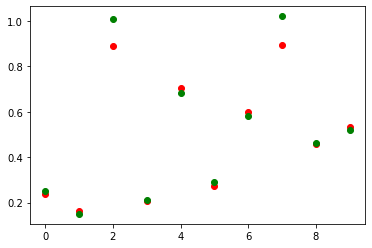

In [121]:
plt.scatter(range(10),res,c='r')
plt.scatter(range(10),test_y,c='g')
plt.show()

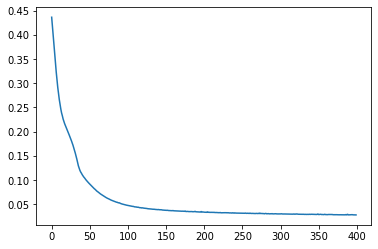

In [122]:
plt.plot(history.history['loss'])

In [144]:
my_test=np.array([np.arange(15,20).reshape((5,1))],dtype=float)
# print(my_test.shape,test_x.shape)
model.predict(my_test)

1/1 [==============================] - 0s 155ms/step


array([[0.96721274]], dtype=float32)